El objetivo del minado de texto en marketing es descubrir patrones y tendencias en los datos de texto para comprender mejor las necesidades y preferencias de los clientes, mejorar la satisfacción del cliente y la experiencia del usuario, y tomar decisiones comerciales informadas.


In [ ]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import snscrape.modules.twitter as sntwitter

In [ ]:
import re
import string

In [ ]:
import nltk

In [ ]:
import pandas as pd 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from wordcloud import WordCloud

In [ ]:
query='(from:Pub_Beer) until:2023-04-15 since:2018-01-01'
#query="cerveceria artesanal since:2022-04-01 until:2023-04-19"

In [ ]:
limit=10000
texto=[]

In [ ]:
for public in sntwitter.TwitterHashtagScraper(query).get_items():
  texto.append([public.date,public.content])
  #if(len(texto))==limit:
  #  break

<ipython-input-1165-82fbbc293cbb>:2: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  texto.append([public.date,public.content])


In [ ]:
datos=pd.DataFrame(texto,columns=['Fecha','Contenido'])

In [ ]:
datos.head()

,Fecha,Contenido
0,2023-04-14 15:19:00+00:00,"¡El que sabe lo que quiere, lo quiere por un r..."
1,2023-04-11 15:59:48+00:00,Comienza la semana con deporte y cerveza.\n#ce...
2,2023-04-05 15:02:30+00:00,"Tú y tu loca manía de beberte la vida, ¡Salud!..."
3,2023-04-04 12:01:30+00:00,¡Personajes que salen de algún lugar del infie...
4,2023-04-03 15:44:16+00:00,¡Qué nunca te falte una tentación prohibida!\n...


In [ ]:
datos['Fecha']=pd.to_datetime(datos['Fecha'].dt.strftime('%Y-%m-%d'))

In [ ]:
datos.head()


,Fecha,Contenido
0,2023-04-14,"¡El que sabe lo que quiere, lo quiere por un r..."
1,2023-04-11,Comienza la semana con deporte y cerveza.\n#ce...
2,2023-04-05,"Tú y tu loca manía de beberte la vida, ¡Salud!..."
3,2023-04-04,¡Personajes que salen de algún lugar del infie...
4,2023-04-03,¡Qué nunca te falte una tentación prohibida!\n...


In [ ]:
datos.dtypes

Fecha        datetime64[ns]
Contenido            object
dtype: object

In [ ]:
def limpiar_tokenizar(texto):
  nuevo_texto=texto.lower()
  nuevo_texto=re.sub('http\S+',' ',nuevo_texto)
  regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
  nuevo_texto=re.sub(regex,' ',nuevo_texto)
  nuevo_texto=re.sub('\d+',' ',nuevo_texto)
  nuevo_texto=re.sub('\\s+',' ',nuevo_texto)
  nuevo_texto=nuevo_texto.split(sep=' ')
  nuevo_texto=[token for token in nuevo_texto if len(token)>5]
  
  return nuevo_texto

In [ ]:
datos['Texto_limpio']=datos['Contenido'].apply(lambda x:limpiar_tokenizar(x))

In [ ]:
datos['años']=datos['Fecha'].dt.year

In [ ]:
datos.head()

,Fecha,Contenido,Texto_limpio,años
0,2023-04-14,"¡El que sabe lo que quiere, lo quiere por un r...","[quiere, quiere, cervezaconactitud, cerveza, c...",2023
1,2023-04-11,Comienza la semana con deporte y cerveza.\n#ce...,"[comienza, semana, deporte, cerveza, cervezaco...",2023
2,2023-04-05,"Tú y tu loca manía de beberte la vida, ¡Salud!...","[beberte, ¡salud, cervezaconactitud, cerveza, ...",2023
3,2023-04-04,¡Personajes que salen de algún lugar del infie...,"[¡personajes, infierno, realmente, existen, ce...",2023
4,2023-04-03,¡Qué nunca te falte una tentación prohibida!\n...,"[tentación, prohibida, cervezaconactitud, cerv...",2023


In [ ]:
datos_tidy=datos.explode(column='Texto_limpio')

In [ ]:
datos_tidy.head()

,Fecha,Contenido,Texto_limpio,años
0,2023-04-14,"¡El que sabe lo que quiere, lo quiere por un r...",quiere,2023
0,2023-04-14,"¡El que sabe lo que quiere, lo quiere por un r...",quiere,2023
0,2023-04-14,"¡El que sabe lo que quiere, lo quiere por un r...",cervezaconactitud,2023
0,2023-04-14,"¡El que sabe lo que quiere, lo quiere por un r...",cerveza,2023
0,2023-04-14,"¡El que sabe lo que quiere, lo quiere por un r...",craftbeer,2023


In [ ]:
stop_words=list(stopwords.words('spanish'))

In [ ]:
data_stop=pd.read_csv("https://gist.githubusercontent.com/cr0wg4n/78554c5d0afa9944d2fa3a4435d83a57/raw/df59fb916108f2a58bf1a3d8c62818b44231586d/spanish-stop-words.txt")

In [ ]:
data_stop=list(data_stop['a'])

In [ ]:
stop_words.extend((data_stop))

In [ ]:
datos_tidy=datos_tidy[~datos_tidy['Texto_limpio'].isin(stop_words)].copy()

In [ ]:
del datos_tidy['Contenido']

In [ ]:
datos_tidy.head()

,Fecha,Texto_limpio,años
0,2023-04-14,cervezaconactitud,2023
0,2023-04-14,cerveza,2023
0,2023-04-14,craftbeer,2023
0,2023-04-14,cervezaartesanal,2023
0,2023-04-14,frases,2023


In [ ]:
datos_tidy['años'].unique().tolist()

[2023, 2022, 2021, 2020, 2019, 2018]

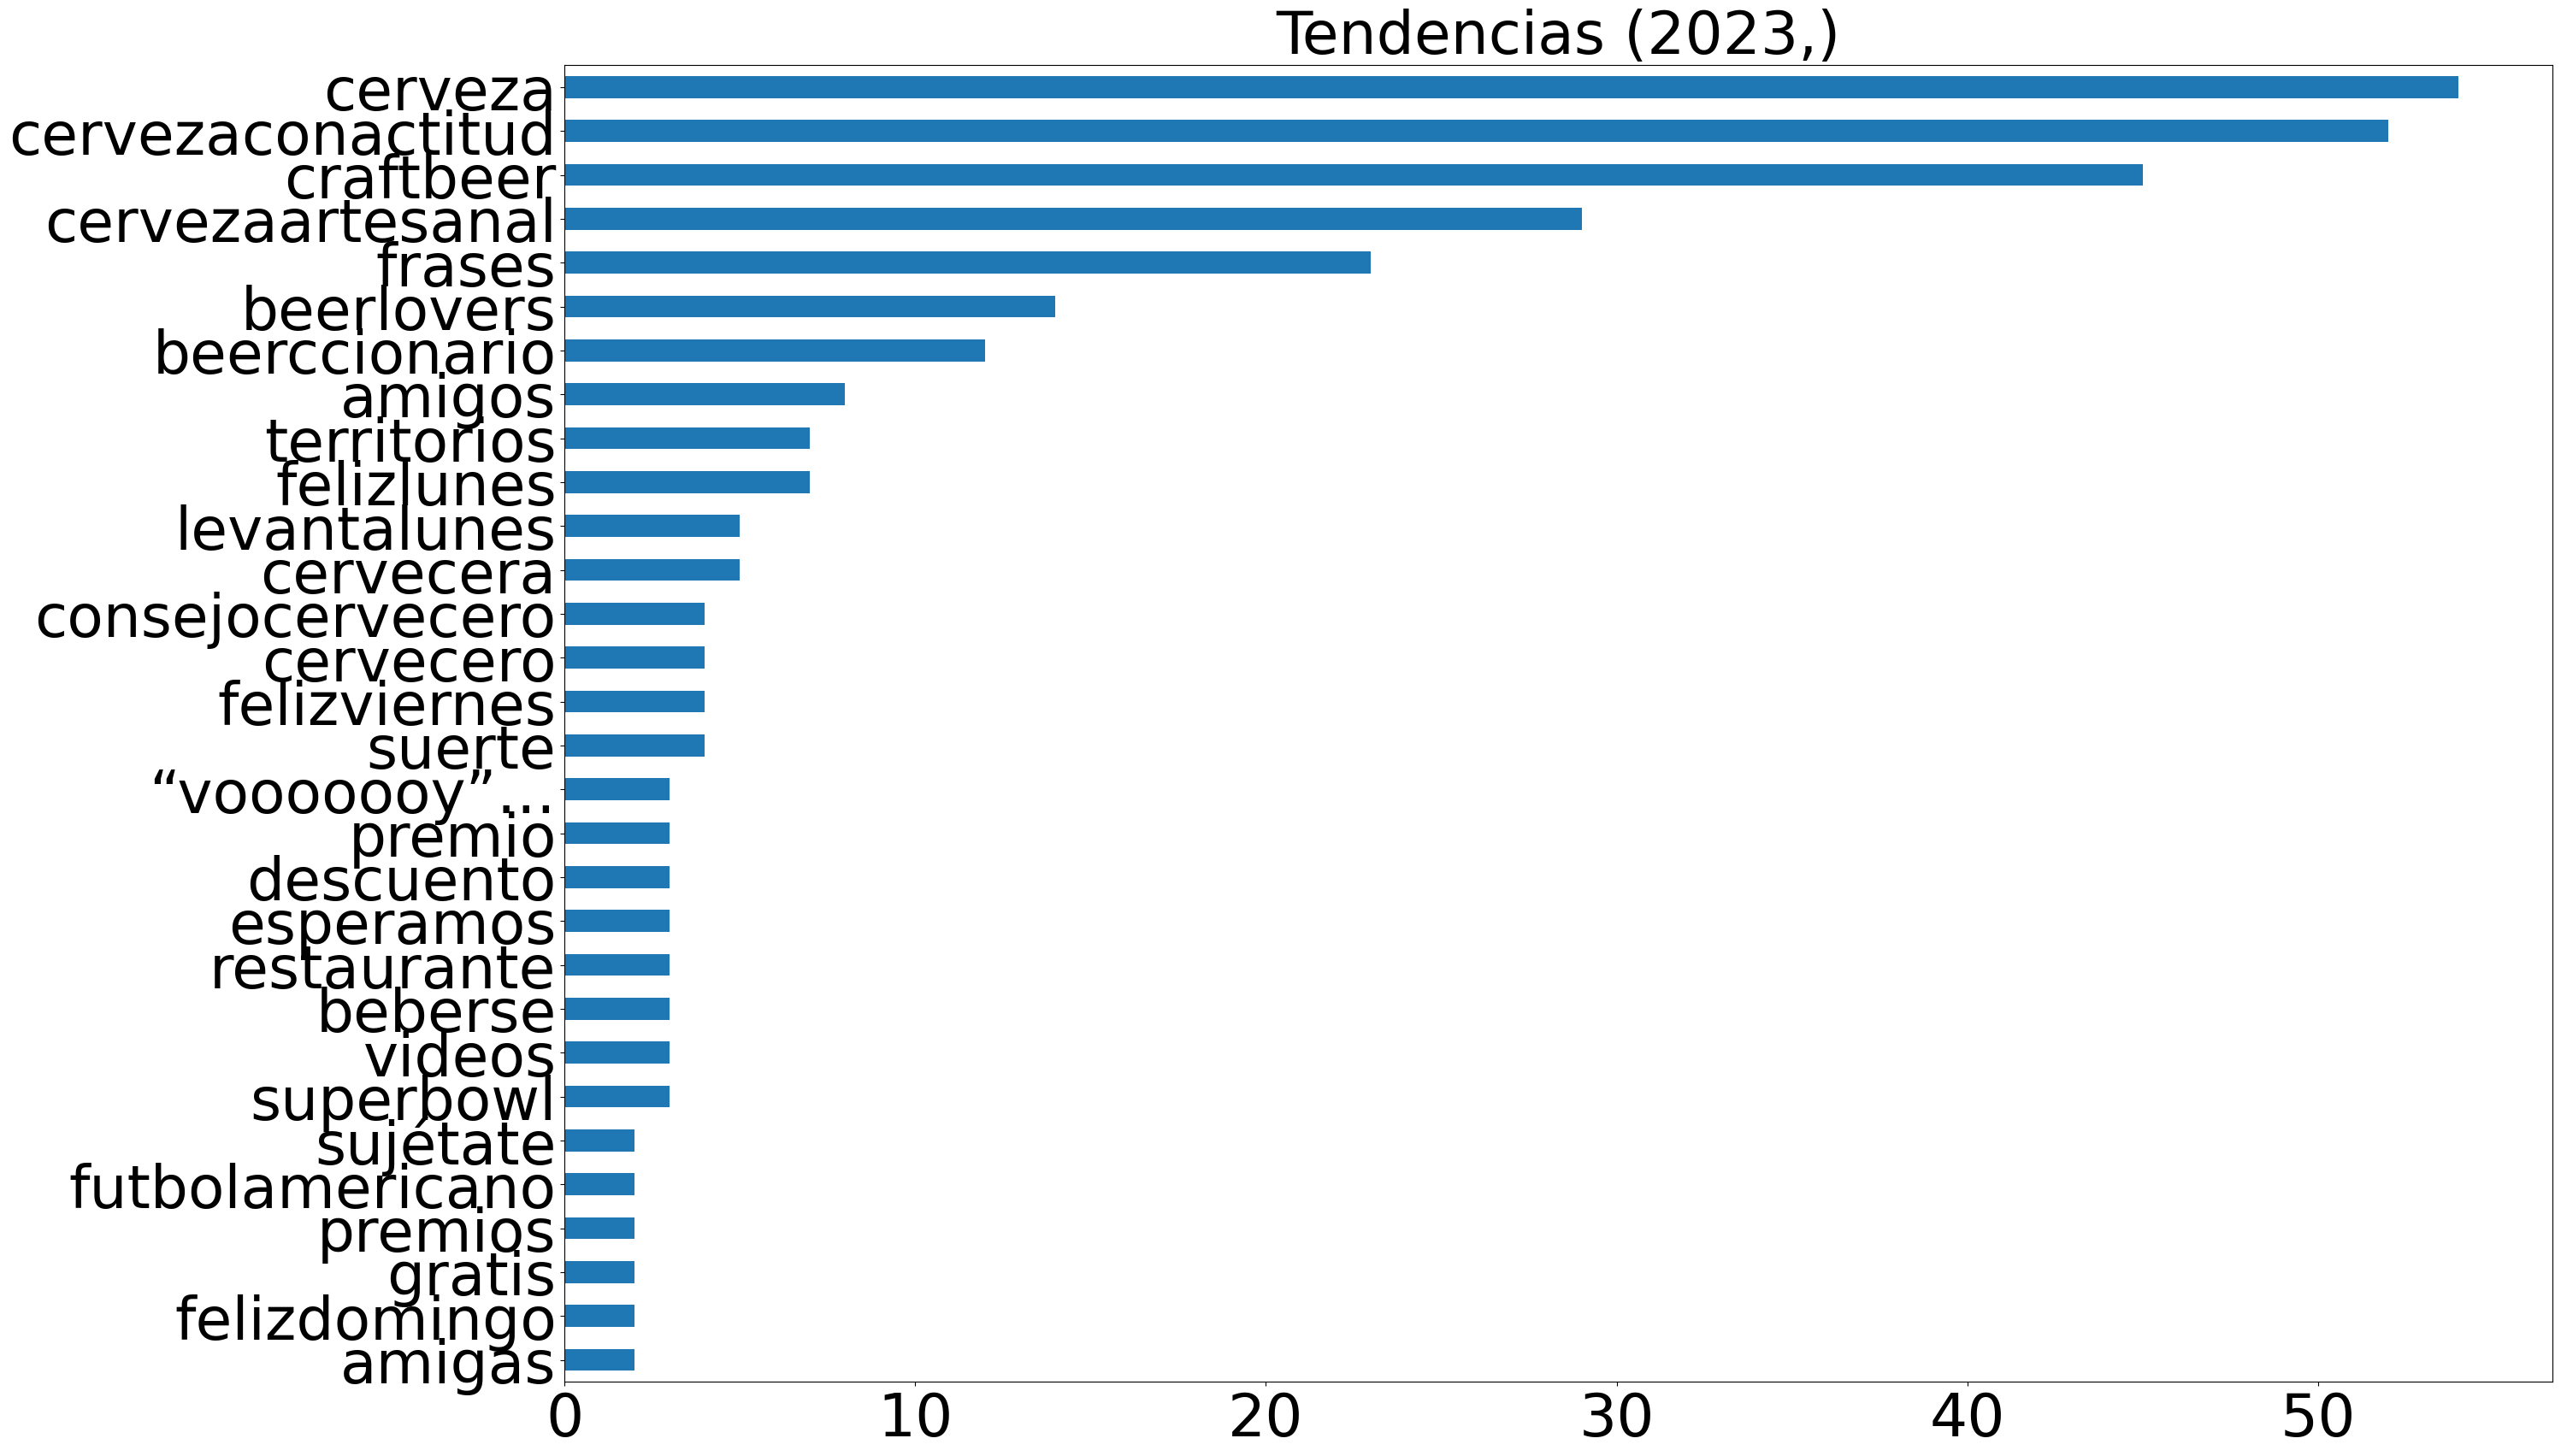

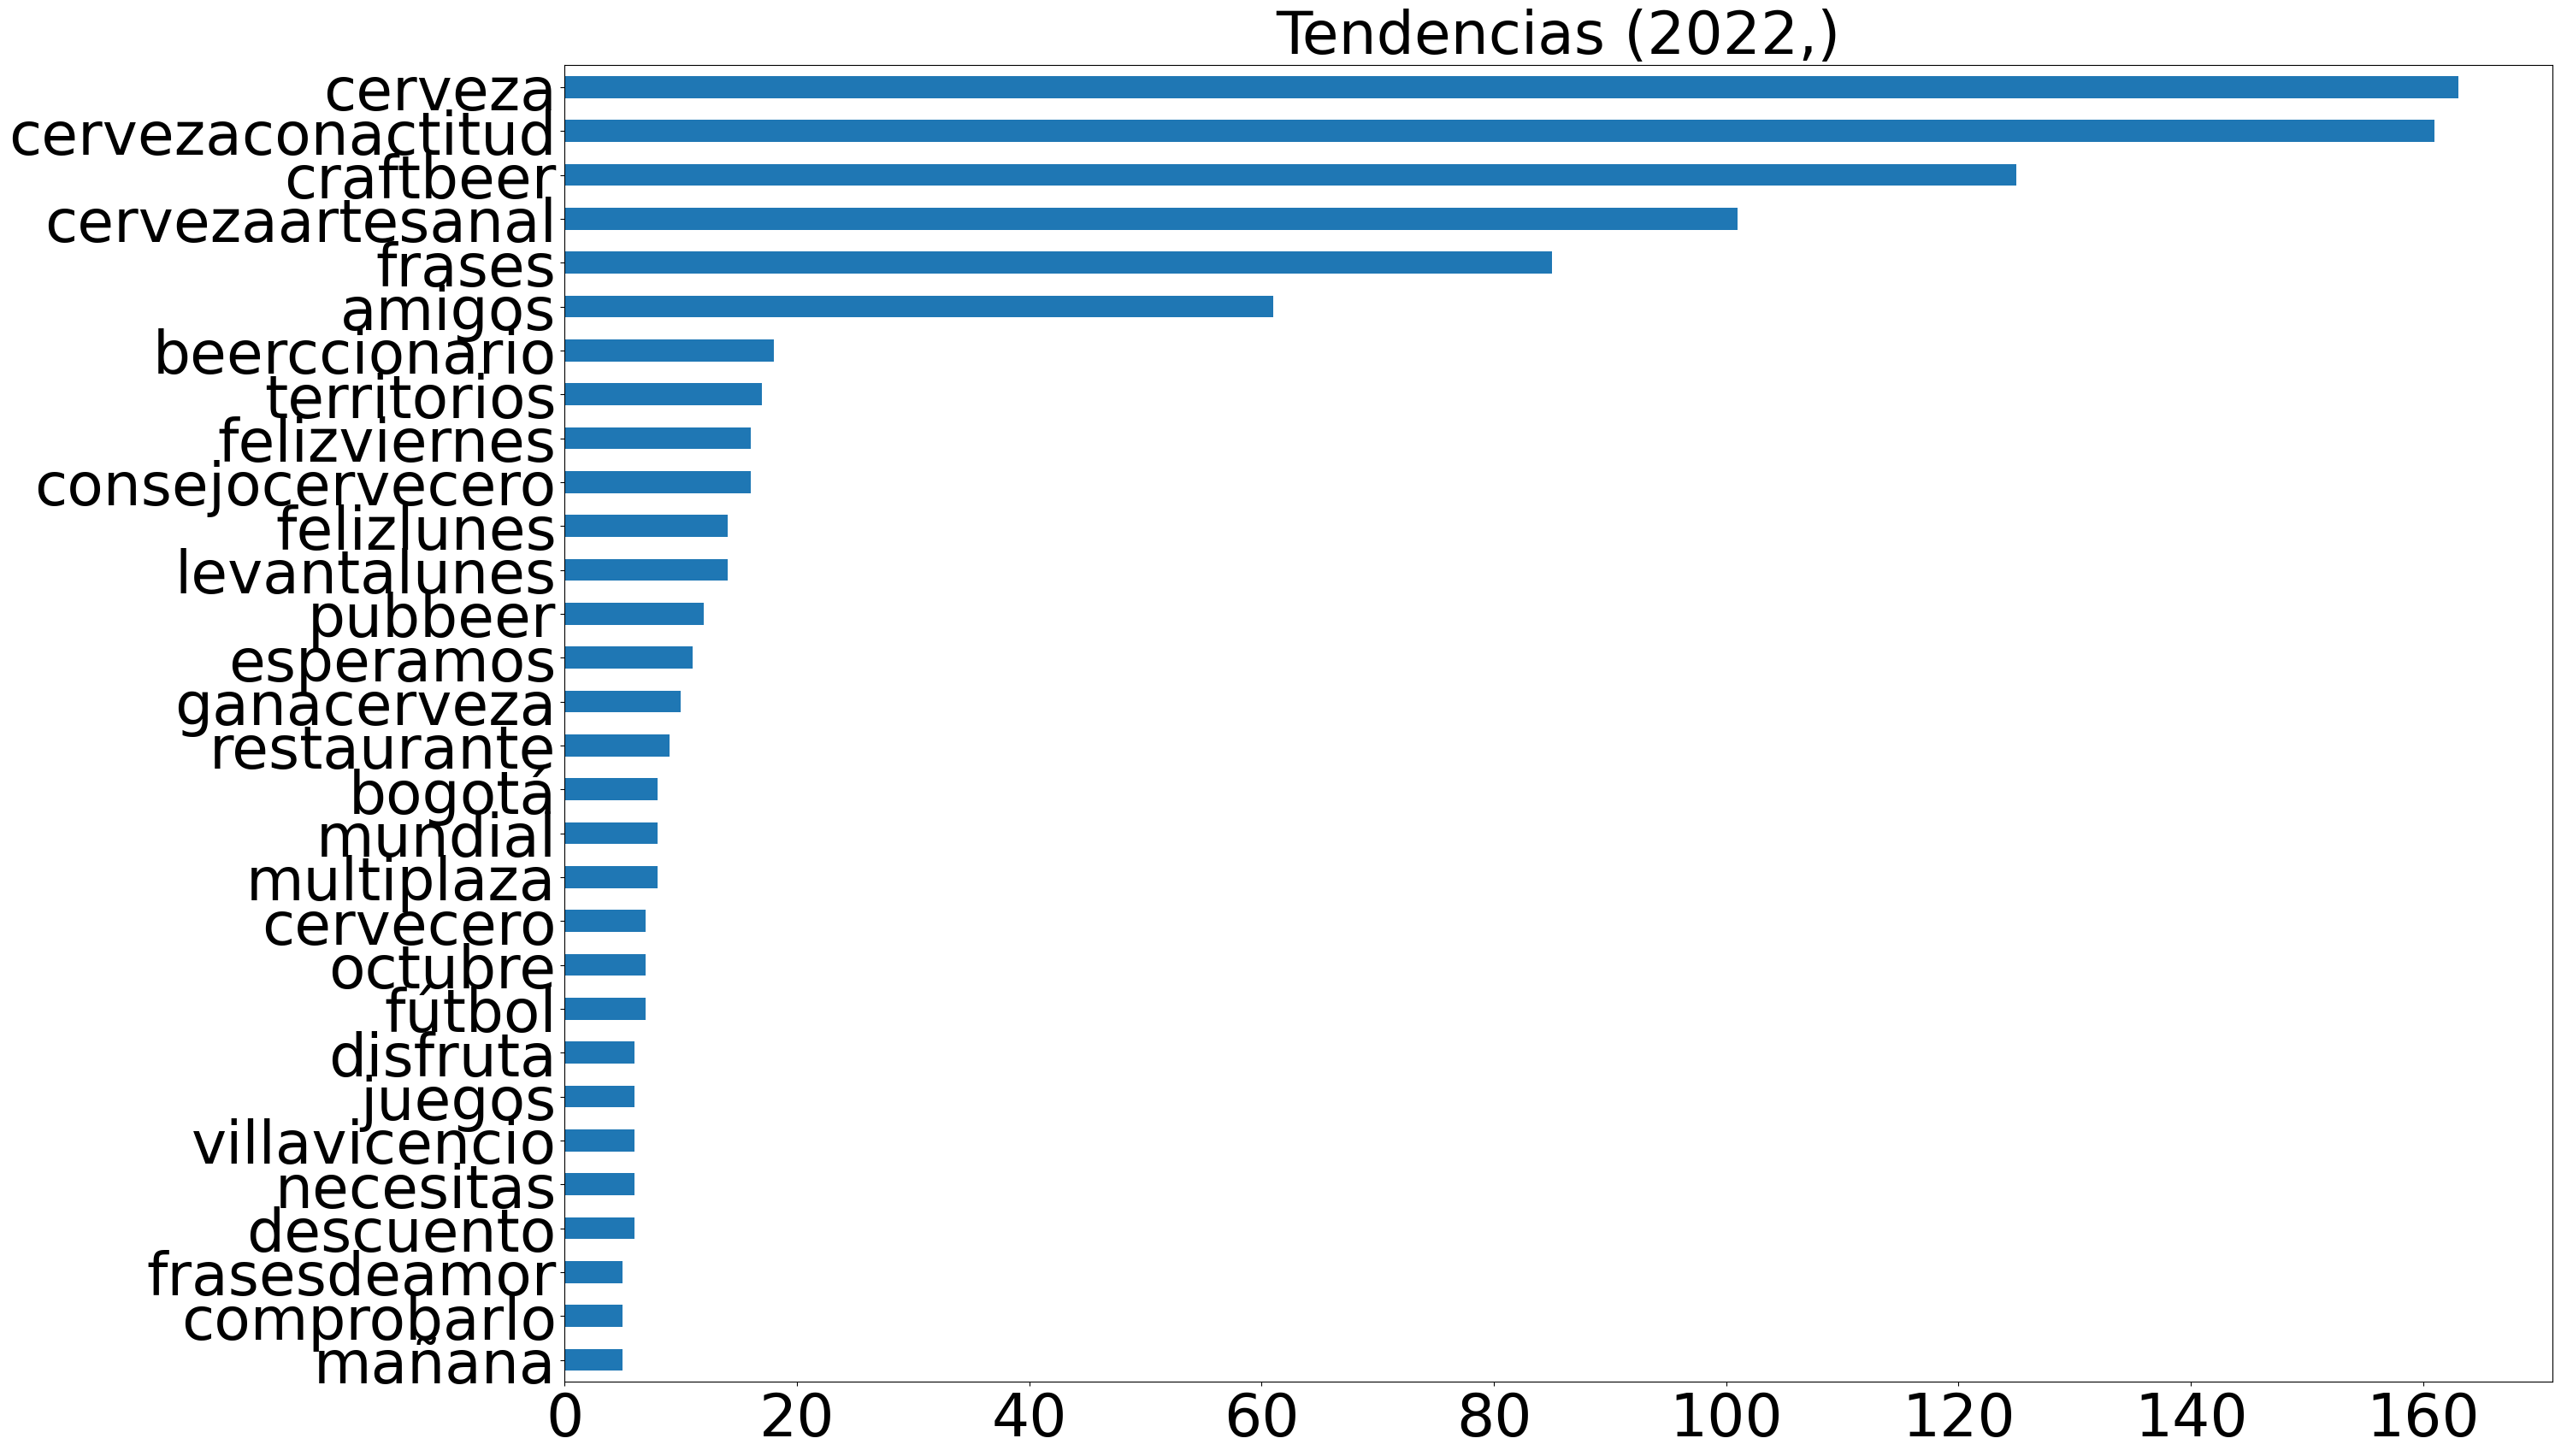

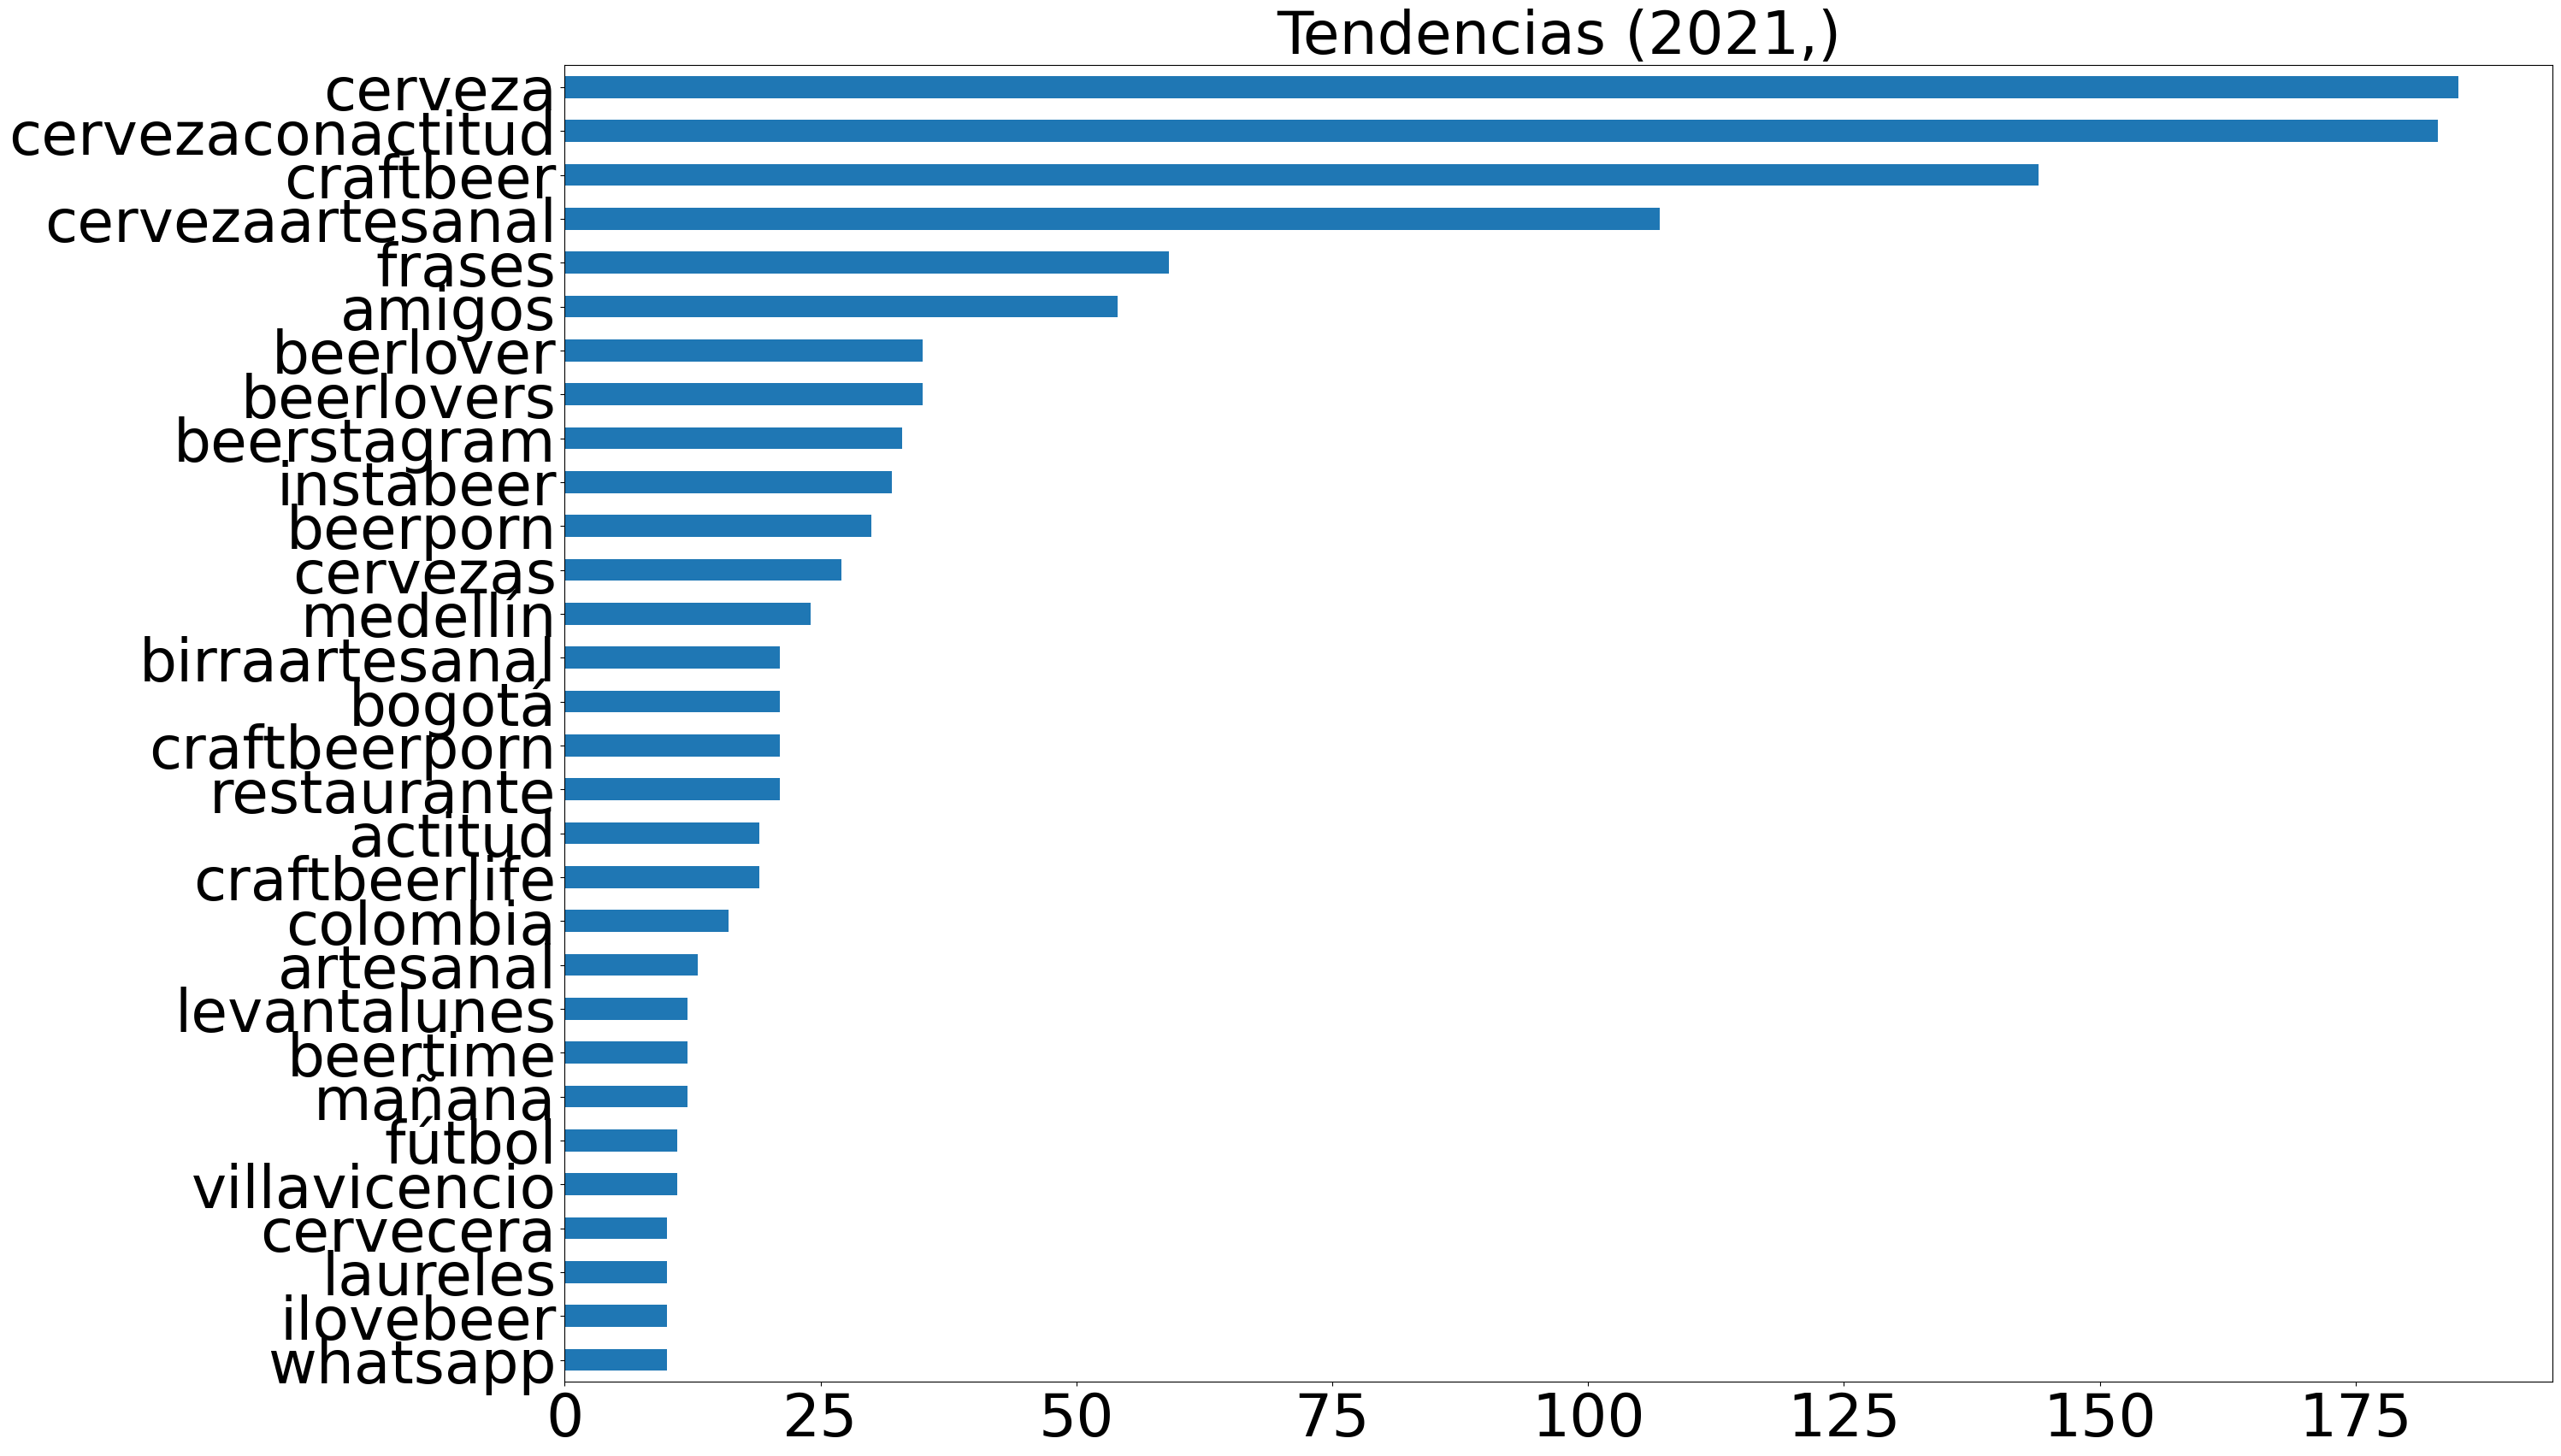

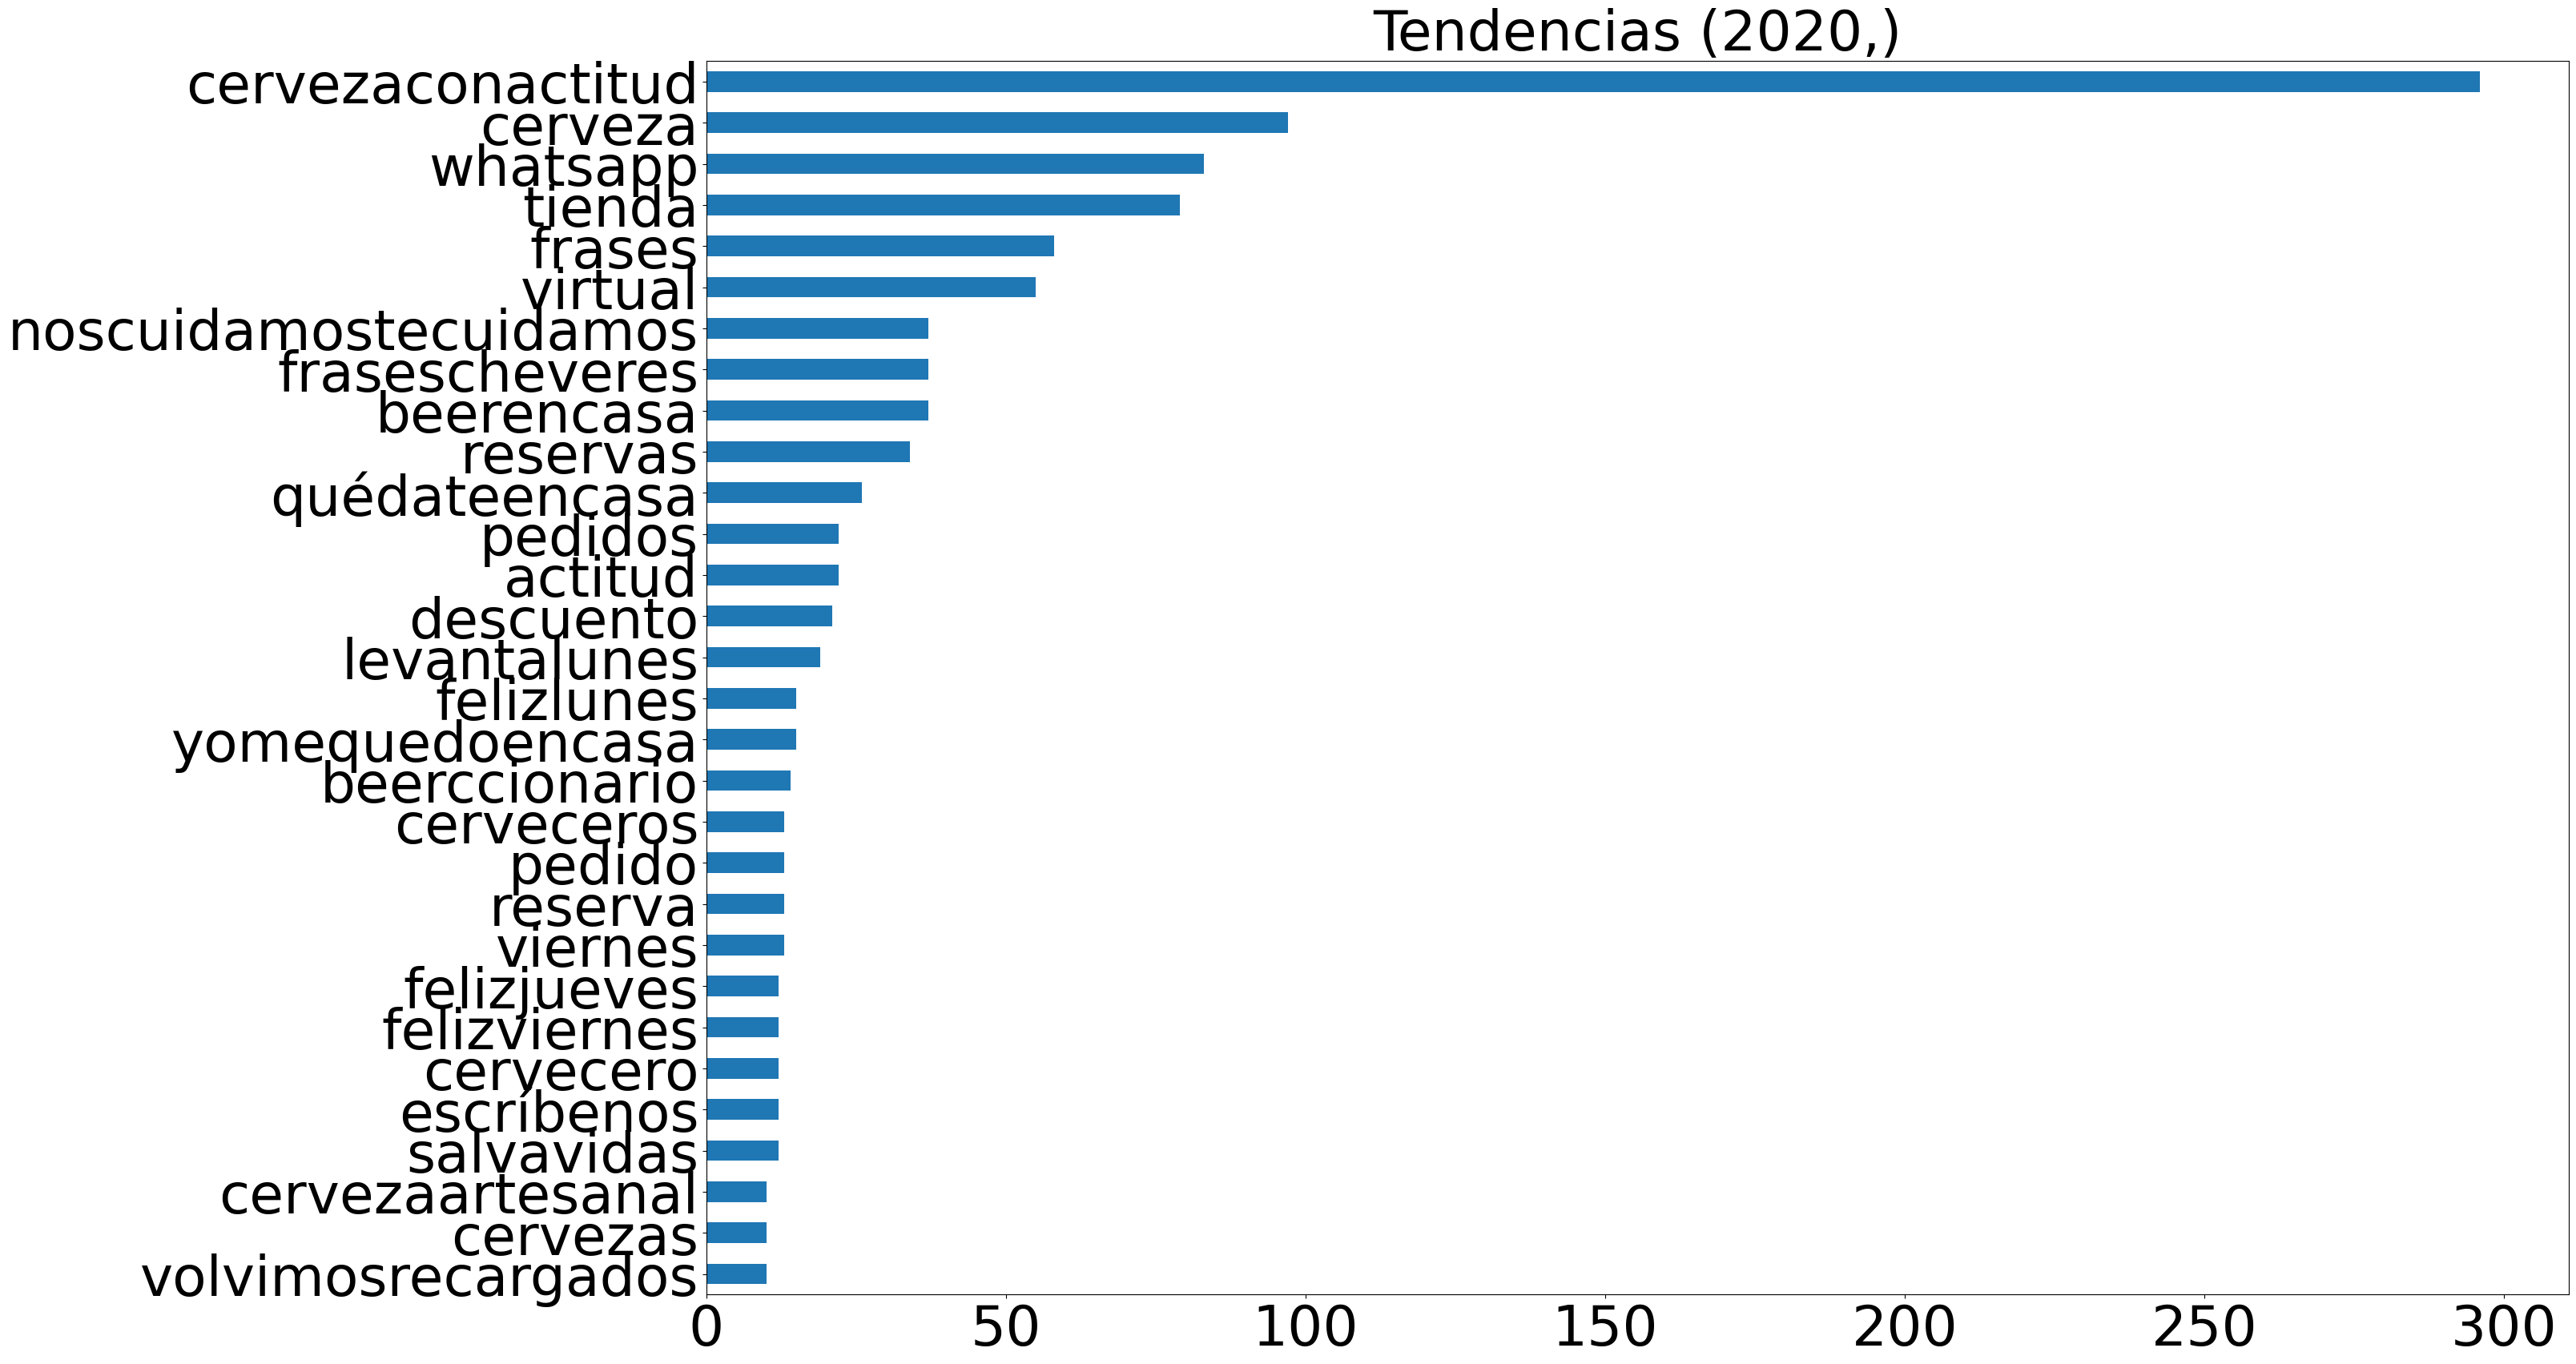

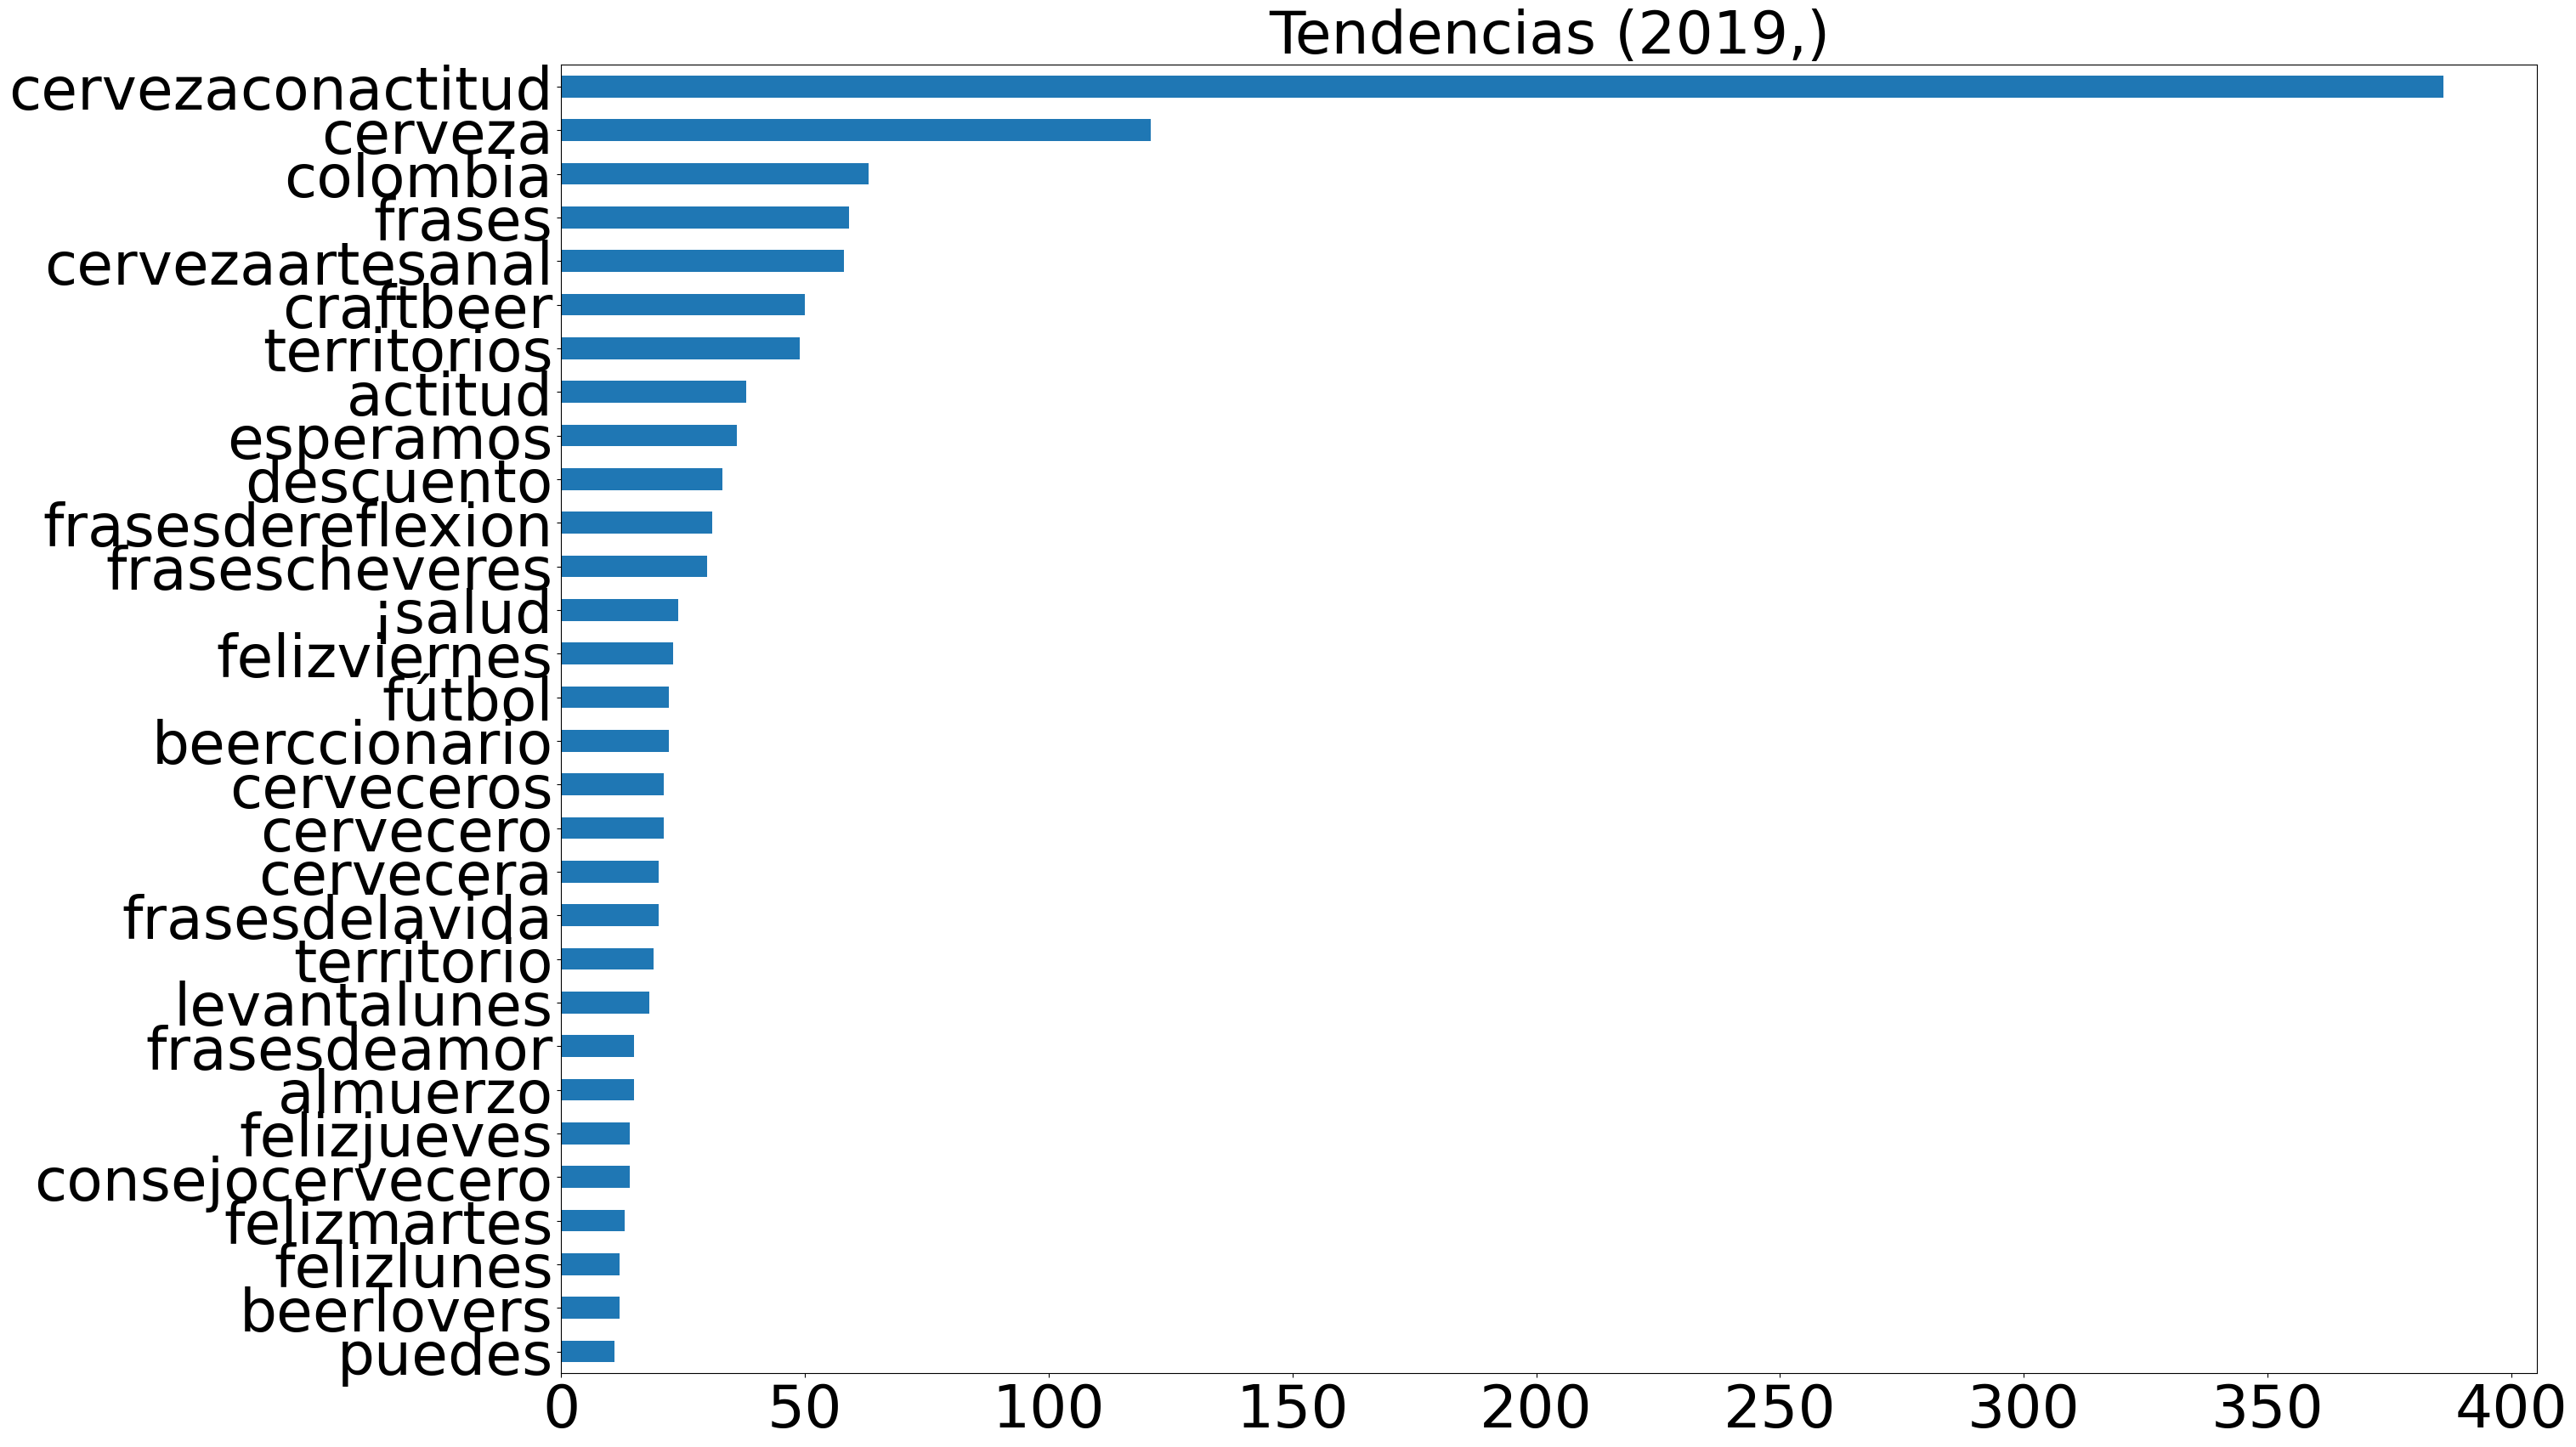

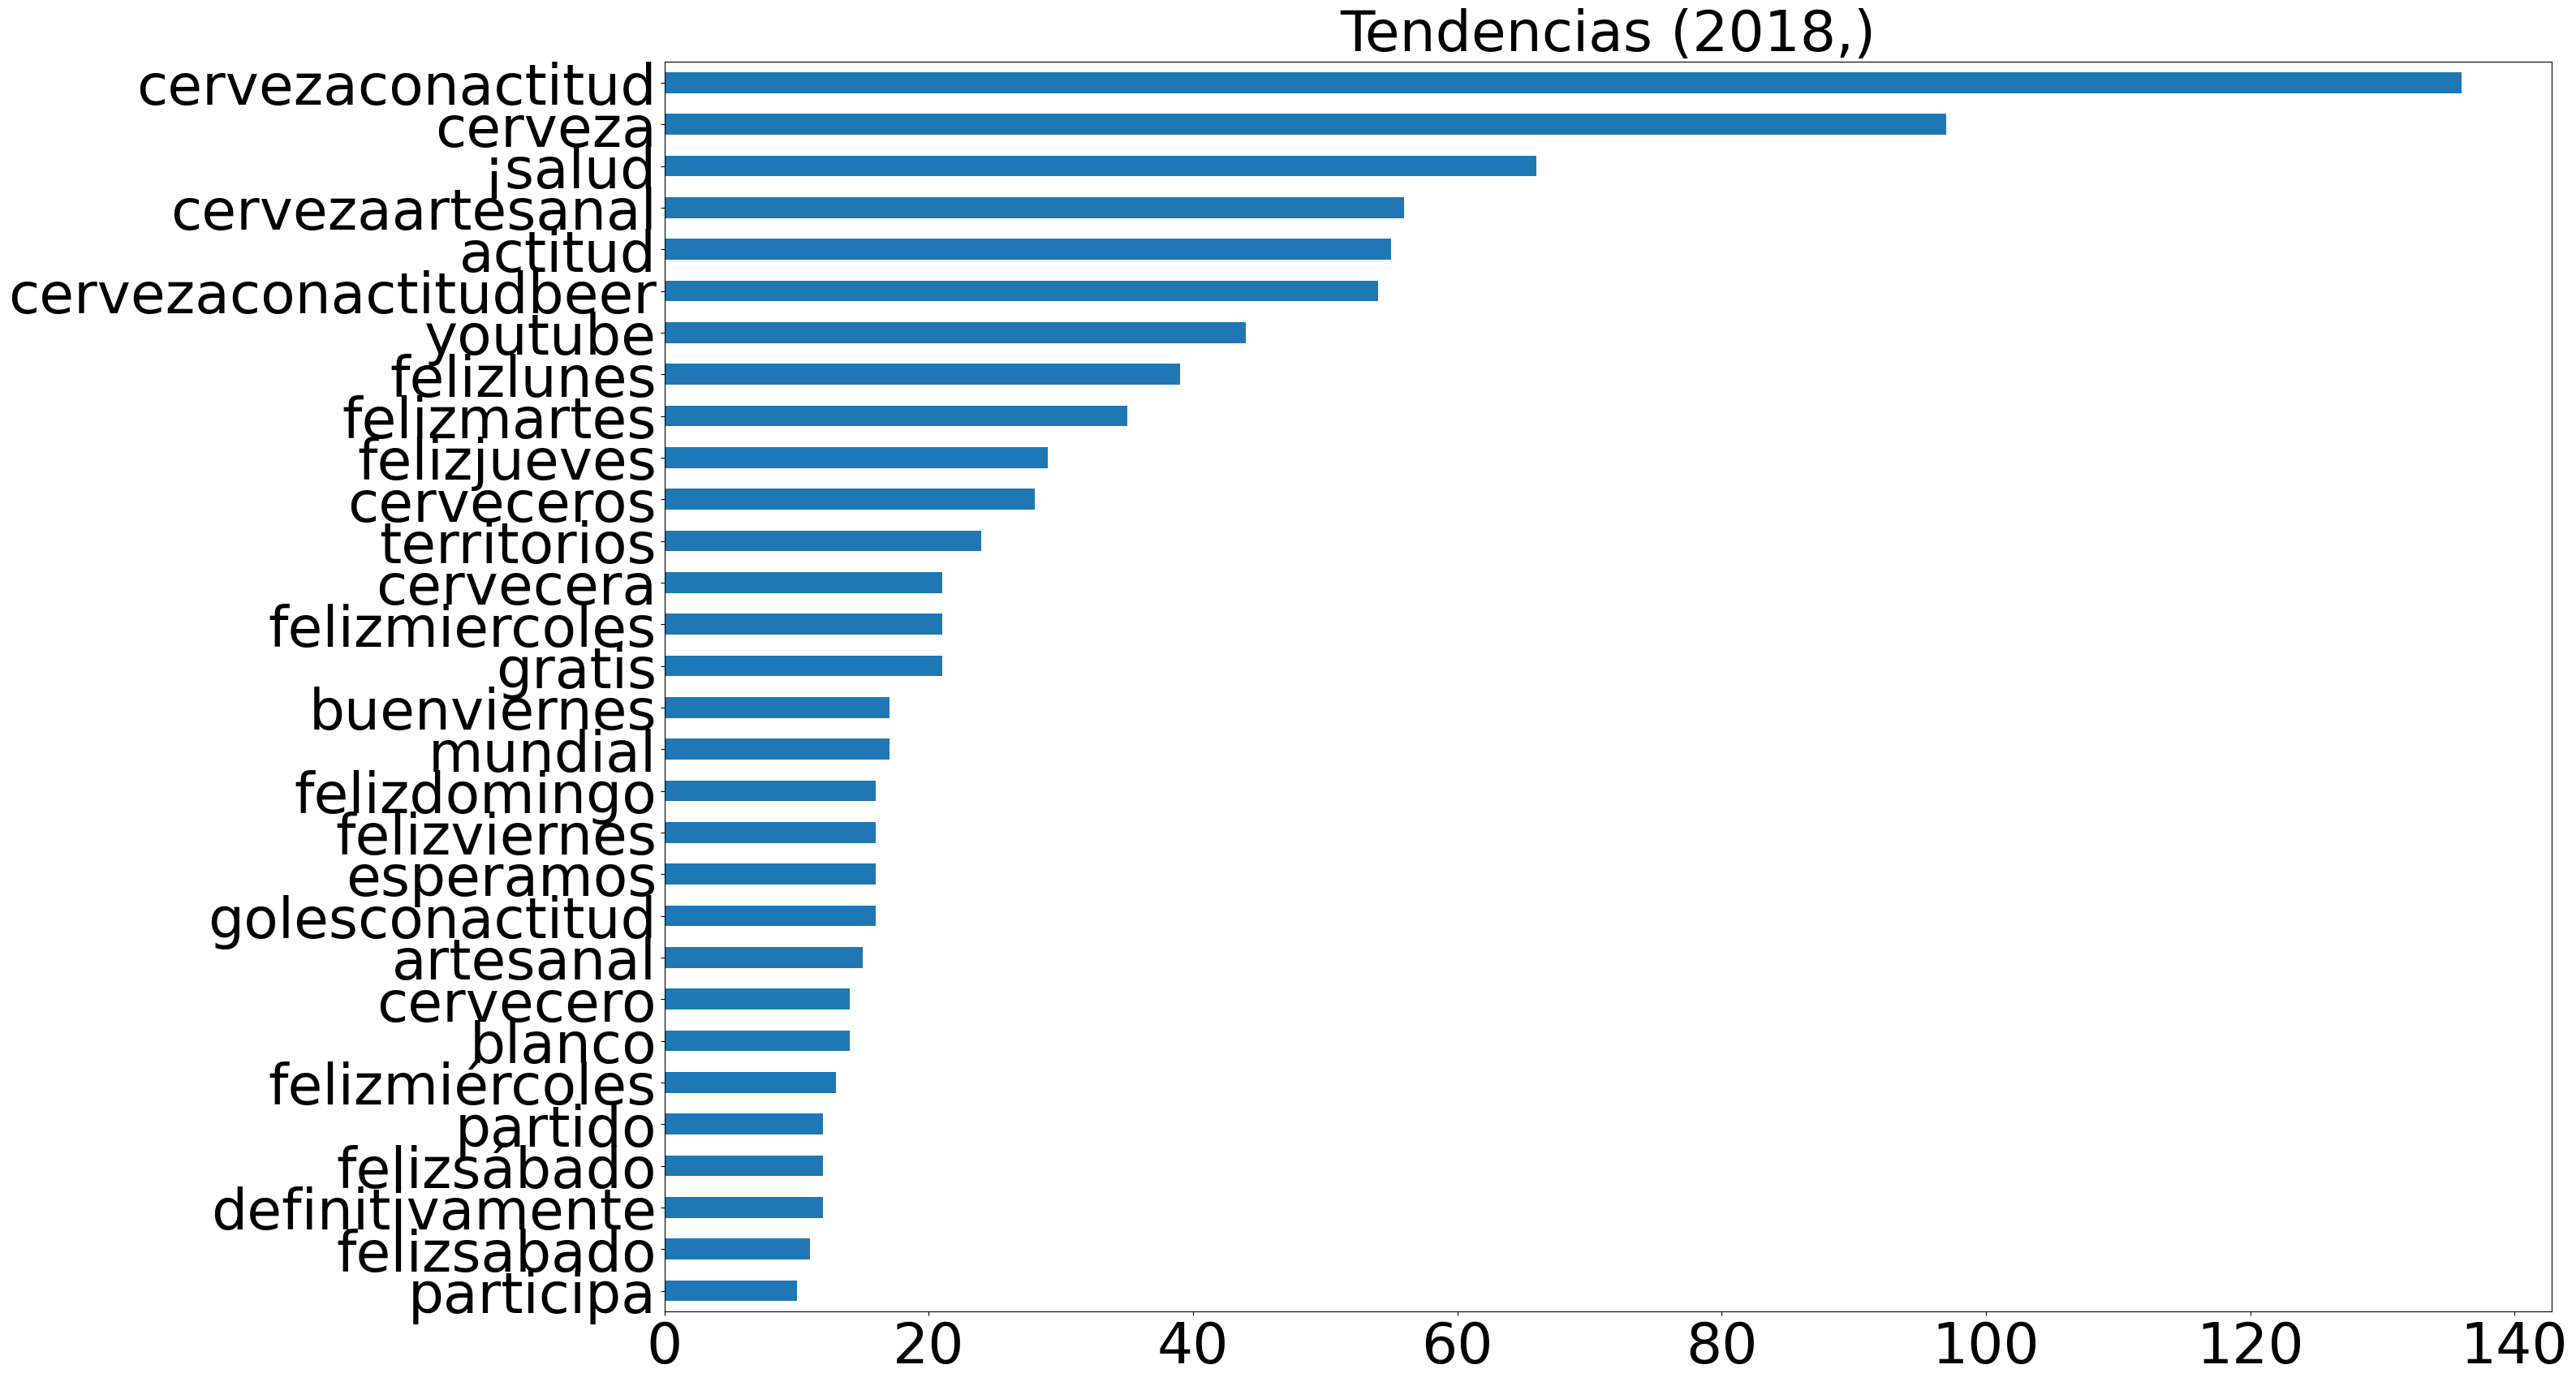

In [ ]:
if len(datos_tidy['años'].unique().tolist())>1:
  for i in zip(datos_tidy['años'].unique().tolist()):
    fig,axs=plt.subplots(figsize=(30,20))
    grafica=datos_tidy[datos_tidy['años']==i]
    grafica=grafica['Texto_limpio'].value_counts(ascending=False).head(30)
    grafica.plot(kind='barh',ax=axs,fontsize=50)
    axs.invert_yaxis()
    axs.set_title(f'Tendencias {i}',fontsize=50)

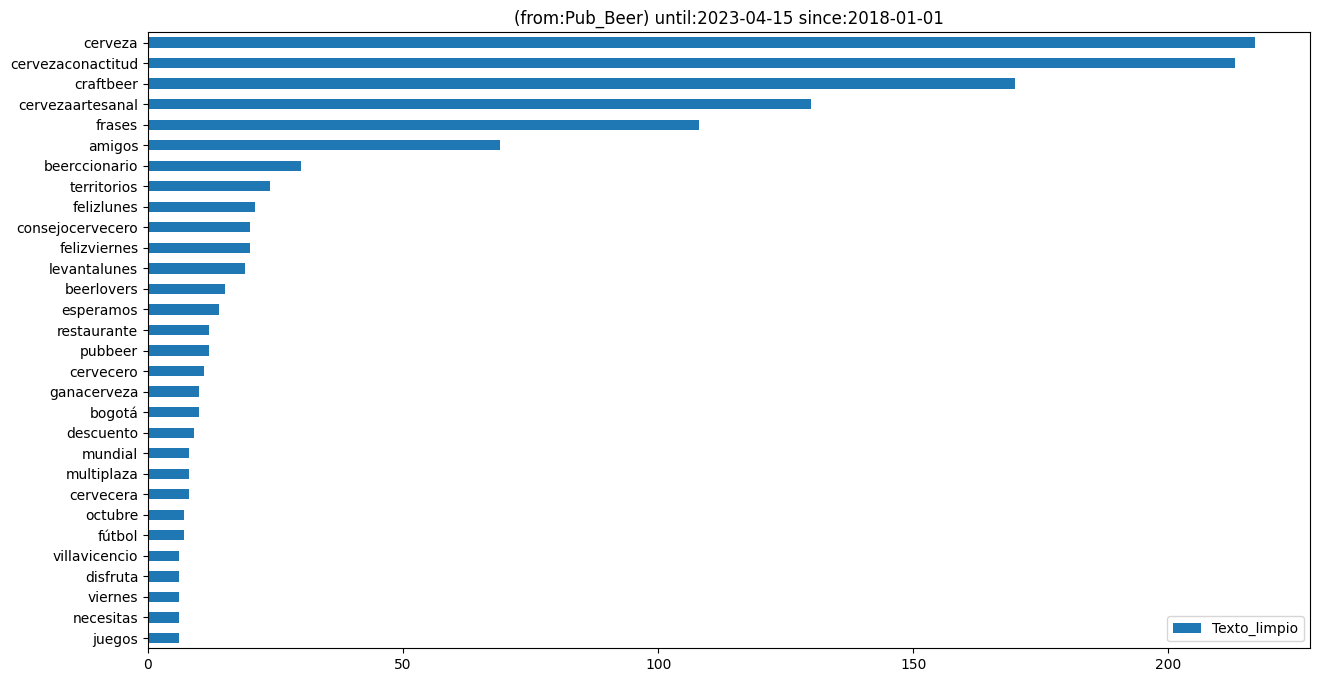

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))

data=datos_tidy[datos_tidy['Fecha']>'2022']
data=data['Texto_limpio'].value_counts(ascending=False).head(30)
data.plot(kind='barh',ax=ax)
ax.invert_yaxis()
ax.set_title(query)
ax.legend()

#LDA identificacion de topicos 


In [ ]:
import gensim 

In [ ]:
from gensim.utils import simple_preprocess

In [ ]:
import gensim.corpora as corpora

In [ ]:
from pprint import pprint

In [ ]:
p_lda=datos['Texto_limpio'].values.tolist()

In [ ]:
def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence),deacc=True))

El parámetro deacc se utiliza para indicar si se desea eliminar o no los acentos de las palabras en la oración.

In [ ]:
words_lda=p_lda

In [ ]:
idword=corpora.Dictionary(words_lda)

Creación de un diccionario: a continuación, se crea un diccionario de palabras a partir del conjunto de documentos preprocesados. Cada palabra del conjunto de documentos se asigna a un índice único en el diccionari

In [ ]:
idword

In [ ]:
corpus=[idword.doc2bow(text) for text in words_lda]

Creación de una matriz de términos-documentos: se construye una matriz de términos-documentos a partir del conjunto de documentos preprocesados y el diccionario. Cada fila representa un documento y cada columna representa una palabra del diccionario. El valor en cada celda de la matriz indica la frecuencia de esa palabra en ese documento.

In [ ]:
topics=5

In [ ]:
lda_model=gensim.models.LdaMulticore(corpus=corpus,id2word=idword,num_topics=topics, passes=20)

In [ ]:
pprint(lda_model.print_topics())

[(0,
  '0.102*"cervezaconactitud" + 0.064*"cerveza" + 0.047*"craftbeer" + '
  '0.041*"frases" + 0.038*"cervezaartesanal" + 0.017*"amigos" + '
  '0.011*"actitud" + 0.009*"beerlovers" + 0.009*"beerccionario" + '
  '0.008*"felizviernes"'),
 (1,
  '0.066*"cervezaconactitud" + 0.051*"cerveza" + 0.027*"tienda" + '
  '0.026*"whatsapp" + 0.019*"virtual" + 0.015*"youtube" + 0.014*"reservas" + '
  '0.014*"frasescheveres" + 0.013*"beerencasa" + 0.010*"cervezaartesanal"'),
 (2,
  '0.046*"cervezaconactitud" + 0.029*"cerveza" + 0.018*"colombia" + '
  '0.012*"cervezaartesanal" + 0.010*"frasesdelavida" + '
  '0.009*"frasesdereflexion" + 0.008*"frasesdeamor" + 0.007*"participa" + '
  '0.007*"tricolor" + 0.007*"quédateencasa"'),
 (3,
  '0.028*"cervezaconactitud" + 0.015*"territorio" + 0.013*"puedes" + '
  '0.012*"gracias" + 0.010*"nuestro" + 0.010*"contacto" + 0.009*"partido" + '
  '0.009*"también" + 0.009*"cerveceros" + 0.009*"contigo"'),
 (4,
  '0.056*"cervezaconactitud" + 0.040*"nuestros" + 0.034*"te

['"cervezaconactitud" ', '"cerveza" ', '"craftbeer" ', '"frases" ', '"cervezaartesanal" ', '"amigos" ', '"actitud" ', '"beerlovers" ', '"beerccionario" ', '"felizviernes"']


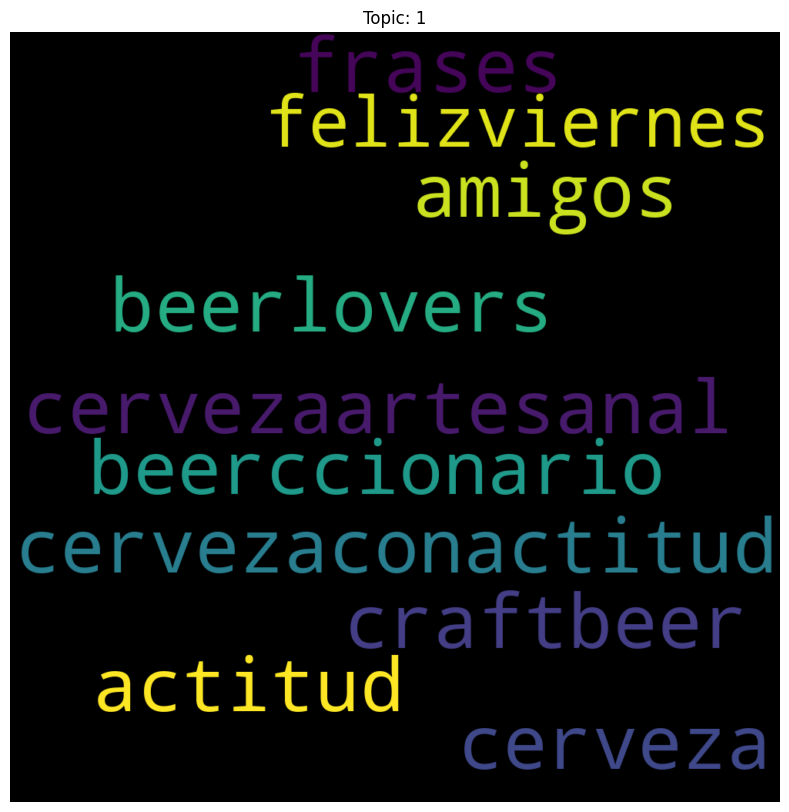

['"cervezaconactitud" ', '"cerveza" ', '"tienda" ', '"whatsapp" ', '"virtual" ', '"youtube" ', '"reservas" ', '"frasescheveres" ', '"beerencasa" ', '"cervezaartesanal"']


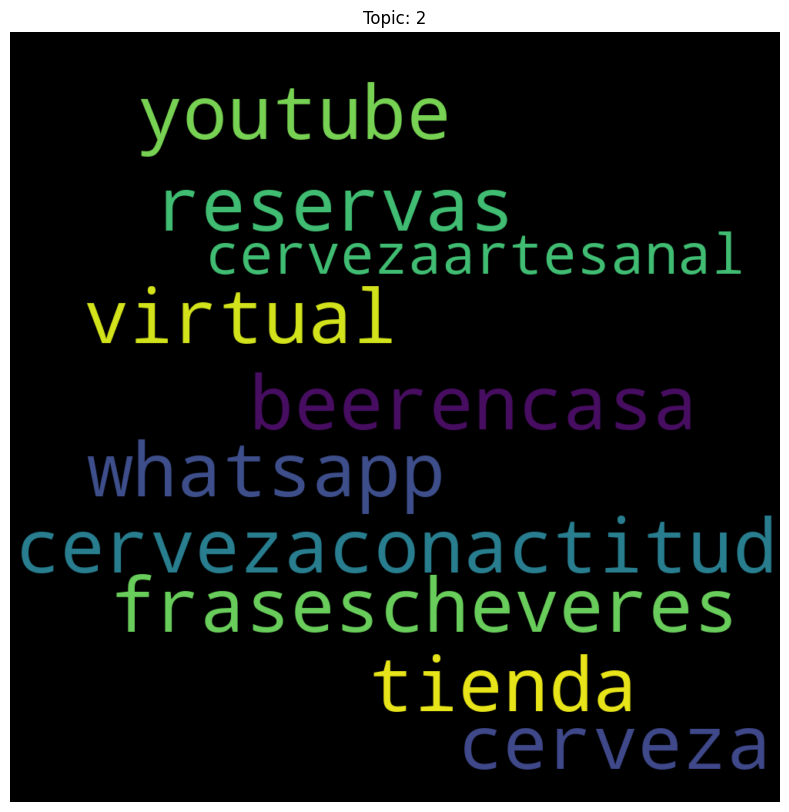

['"cervezaconactitud" ', '"cerveza" ', '"colombia" ', '"cervezaartesanal" ', '"frasesdelavida" ', '"frasesdereflexion" ', '"frasesdeamor" ', '"participa" ', '"tricolor" ', '"quédateencasa"']


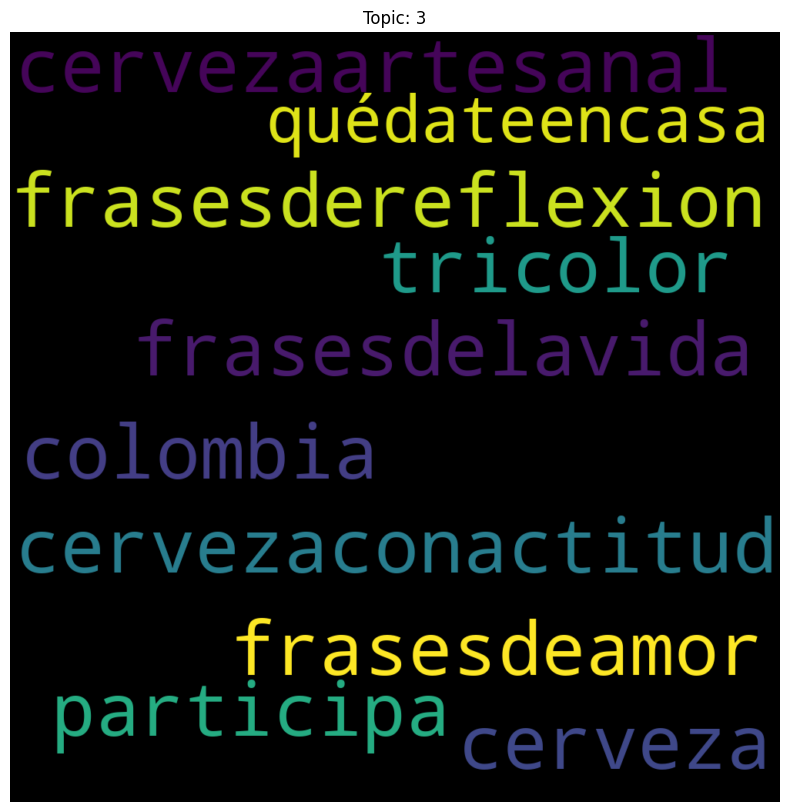

['"cervezaconactitud" ', '"territorio" ', '"puedes" ', '"gracias" ', '"nuestro" ', '"contacto" ', '"partido" ', '"también" ', '"cerveceros" ', '"contigo"']


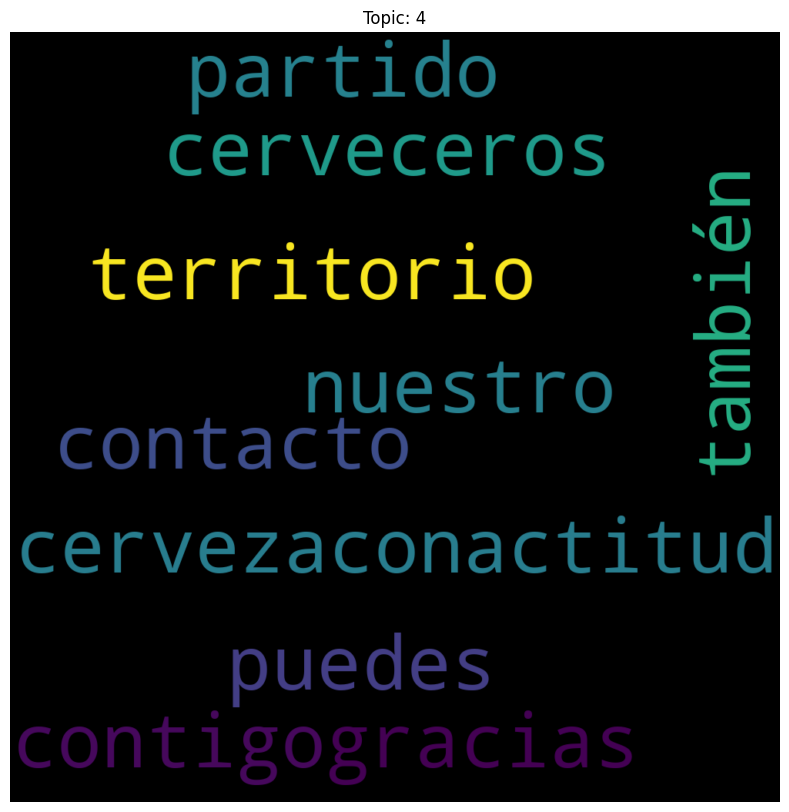

['"cervezaconactitud" ', '"nuestros" ', '"territorios" ', '"cerveza" ', '"cervezaartesanal" ', '"¡salud" ', '"cervezaconactitudbeer" ', '"actitud" ', '"esperamos" ', '"cervecero"']


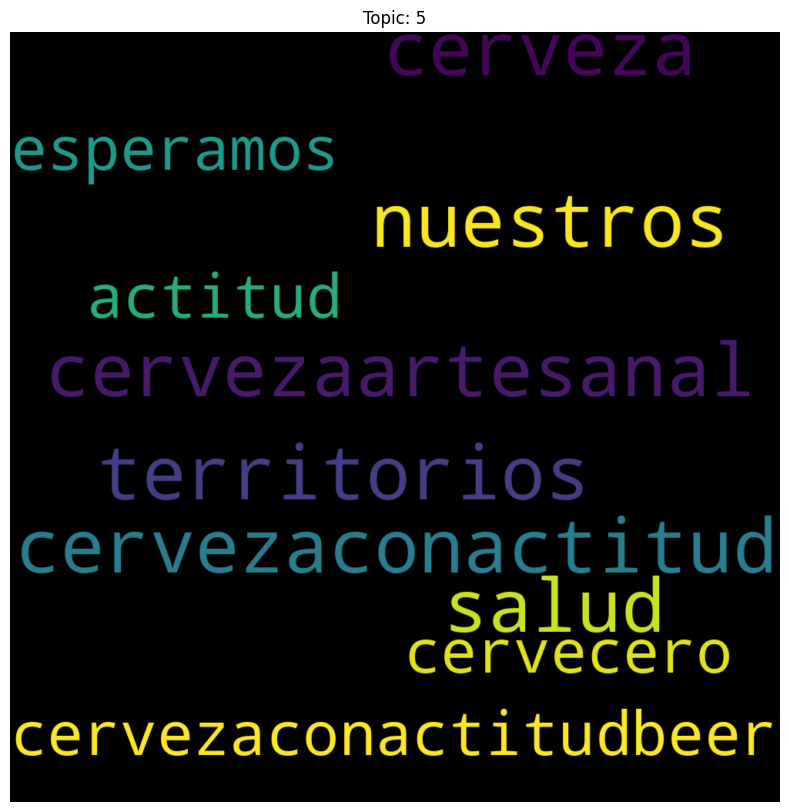

In [ ]:
for i,j in enumerate(lda_model.print_topics()): 
  topic_words=[]
  for z in j[1].split("+"):
    topic_words.append(z.split("*")[1])  
  print(topic_words)
  topic_words=str(topic_words)
  wordcloud = WordCloud(width=1000, height=1000,random_state=21,max_font_size=110).generate(topic_words)
  plt.figure(figsize=(15,10))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.title("Topic: {}".format(i+1))
  plt.show()